# Feature Selection by <font color=red>Chisquare, ANOVA and Mutual Information</font> on Diabetes<br/> (Classification Model)

In this program we continue work on __classification model__. We've already a __baselined__ taking __all the features__ present in the original dataset(<a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Baseline%20Classification%20Model.ipynb'>Baseline Classification Model</a>). Here, we apply __Chisquare__ to fetch only the __significant features__ from the complete collection; train and test to see if there is any improvement. 

__Chisquare__ uses one feature at at time it is a __Univariate Analysis__ method. It __measures the dependence__ between variables and the __target__ to __weed out features which are irrelevant__ to the classification.

<img src='../Preparing Data for Machine Learning/Data/Filter Methods.png' width=500/>

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
diabetes_df = pd.read_csv('Data/pima-indians-diabetes.data.csv')
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes_df.drop('class', axis=1)
y = diabetes_df['class']

In [4]:
X.shape

(768, 8)

In [5]:
# Convert all variables to float in order to avoid warnings for complex numerical computations
X = X.astype(np.float64)

In [6]:
from sklearn.feature_selection import chi2, SelectKBest

select_features = SelectKBest(chi2, k=3)
X_new = select_features.fit_transform(X, y)
X_new.shape

(768, 3)

NOTE:
- The <font color=red>chi2</font> in __sklearn__ computes __scores__ of features using __Chisquare__ based on their significance for __classification__.
- The <font color=red>SelectKBest</font> in __sklearn__ is used to __select specified number of best features__ based on the algorithm, say __chi2__ here.

In [7]:
X_new = X_new.astype(np.float64)

In [8]:
X_new = pd.DataFrame(X_new)
X_new

,0,1,2
0,148.0,0.0,50.0
1,85.0,0.0,31.0
2,183.0,0.0,32.0
3,89.0,94.0,21.0
4,137.0,168.0,33.0
...,...,...,...
763,101.0,180.0,63.0
764,122.0,0.0,27.0
765,121.0,112.0,30.0
766,126.0,0.0,47.0


In [9]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):
        if (X_new.iloc[:, i].equals (X.iloc[:, j])):
            selected_features.append(X.columns[j])
selected_features

['Glucose', 'Insulin', 'Age']

In [10]:
rejected_features = set(list(X)) - set(selected_features)
rejected_features

{'BP', 'Mass', 'Pedigree', 'Pregnancies', 'Skin Thickness'}

<font color=red>__How do we find K?__</font>

__One way to find out K is to try for different values of K; train model to see which model performs well and pick the value of K.__

In [11]:
# Pick all features excluding the target variable

features = list(diabetes_df.columns[:-1])
features

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [12]:
# Function to build logistic regression model with various parameters

def build_model(target, features, dataset, preprocess_fn, *hyperparameters):
    X = dataset[features]
    Y = dataset[target]
    
    X = preprocess_fn(X, Y, *hyperparameters)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'accuracy': acc,
            'precision': prec,
            'recall': recall}

In [13]:
def compare_results(result_dict):
    for key in result_dict:
        print('Key = ', key)
        
        print('Accuracy score = ', result_dict[key]['accuracy'])
        print('Precision score = ', result_dict[key]['precision'])
        print('Recall score = ', result_dict[key]['recall'])
        print()

In [14]:
def visualize_results_kbest(result_dict):
    # n_components = list(range(0, 8)) may be mistake in the code of Ravi Janani
    n_components = list(range(1, 9))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    
    plt.figure(figsize=(8, 4))
    plt.plot(n_components, acc)
    
    pylab.ylim([0, 1])
    
    plt.xlabel('n_components')
    plt.ylabel('accuracy')

In [15]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    return model

In [16]:
from sklearn.feature_selection import chi2, SelectKBest

def apply_chi2(x, y, k):
    select_features = SelectKBest(chi2, k=k)
    X_new = select_features.fit_transform(X, y)
    return pd.DataFrame(X_new)

In [17]:
result_dict = {}

for i in range(1, 9):
    result_dict['ch2 - ' + str(i)] = build_model('class', features, diabetes_df, apply_chi2, i)

In [18]:
compare_results(result_dict)

Key =  ch2 - 1
Accuracy score =  0.6558441558441559
Precision score =  0.5
Recall score =  0.05660377358490566

Key =  ch2 - 2
Accuracy score =  0.7077922077922078
Precision score =  0.6176470588235294
Recall score =  0.39622641509433965

Key =  ch2 - 3
Accuracy score =  0.7207792207792207
Precision score =  0.5675675675675675
Recall score =  0.4375

Key =  ch2 - 4
Accuracy score =  0.7857142857142857
Precision score =  0.7368421052631579
Recall score =  0.5490196078431373

Key =  ch2 - 5
Accuracy score =  0.7662337662337663
Precision score =  0.5714285714285714
Recall score =  0.4878048780487805

Key =  ch2 - 6
Accuracy score =  0.7792207792207793
Precision score =  0.7547169811320755
Recall score =  0.6557377049180327

Key =  ch2 - 7
Accuracy score =  0.7727272727272727
Precision score =  0.7777777777777778
Recall score =  0.5833333333333334

Key =  ch2 - 8
Accuracy score =  0.7467532467532467
Precision score =  0.717391304347826
Recall score =  0.559322033898305



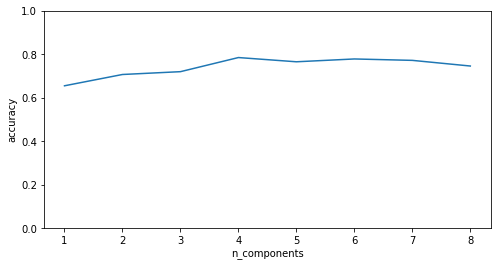

In [19]:
visualize_results_kbest(result_dict)

From the above graph we can find out value of __KBest__

# Feature Selection by <font color=red>ANOVA</font> on Diabetes<br/> (Classification Model)

In [20]:
from sklearn.feature_selection import f_classif

def apply_f_classif(x, y, k):
    select_features = SelectKBest(f_classif, k=k)
    x_new = select_features.fit_transform(x, y)
    
    return pd.DataFrame(x_new)

NOTE:
- The <font color=red>f_classif</font> in __sklearn__ computes __scores__ of features using __ANOVA__ based on their significance for __classification__.
- The <font color=red>f_regression</font> in __sklearn__ computes __scores__ of features using __ANOVA__ based on their significance for __regression__.
- The <font color=red>SelectKBest</font> in __sklearn__ is used to __select specified number of best features__ based on the algorithm, say __ANOVA__ here.

In [21]:
result_dict = {}

for i in range(1, 9):
    result_dict['f_classif - ' + str(i)] = build_model('class', features, diabetes_df, apply_f_classif, i)

In [22]:
compare_results(result_dict)

Key =  f_classif - 1
Accuracy score =  0.7337662337662337
Precision score =  0.7777777777777778
Recall score =  0.375

Key =  f_classif - 2
Accuracy score =  0.7597402597402597
Precision score =  0.8125
Recall score =  0.45614035087719296

Key =  f_classif - 3
Accuracy score =  0.7207792207792207
Precision score =  0.88
Recall score =  0.3548387096774194

Key =  f_classif - 4
Accuracy score =  0.7857142857142857
Precision score =  0.8536585365853658
Recall score =  0.5645161290322581

Key =  f_classif - 5
Accuracy score =  0.7662337662337663
Precision score =  0.7317073170731707
Recall score =  0.5454545454545454

Key =  f_classif - 6
Accuracy score =  0.7532467532467533
Precision score =  0.7666666666666667
Recall score =  0.42592592592592593

Key =  f_classif - 7
Accuracy score =  0.7532467532467533
Precision score =  0.6595744680851063
Recall score =  0.5849056603773585

Key =  f_classif - 8
Accuracy score =  0.7662337662337663
Precision score =  0.7142857142857143
Recall score =  0

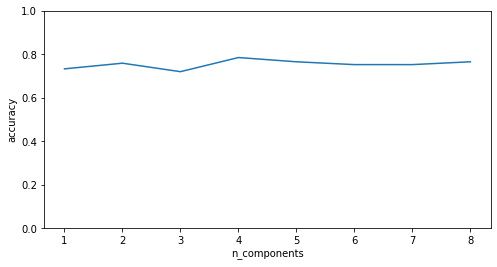

In [23]:
visualize_results_kbest(result_dict)

# Feature Selection by <font color=red>Mutual Information</font> on Diabetes<br/> (Classification Model)

- Selection of features based on mutual information that can be used to measure dependency between two variables.
- Measures the __dependency__ between two random variables based on entropy information - value of 0 indicates variables are completely __independent__.
- __SelectPercentile__ selects features based on a percentile on the highest scores
- SelectPercentile is used to keep the features.

In [24]:
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

def apply_mutual_info_classif(x, y, percentile):
    select_features = SelectPercentile(mutual_info_classif, percentile=percentile)
    x_new = select_features.fit_transform(x, y)
    
    return pd.DataFrame(x_new)

In [25]:
def visualize_results_percentile(result_dict):
    n_componenets = list(range(1, 100, 10))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    
    plt.figure(figsize=(8, 4))
    plt.plot(n_componenets, acc)
    
    pylab.ylim([0, 1])
    
    plt.xlabel('percentile')
    plt.ylabel('accuracy')

In [26]:
result_dict = {}

for i in range(1, 100, 10):
    result_dict['mutual_info_classif percentile - ' + str(i)] = build_model('class', features, diabetes_df, apply_mutual_info_classif, i)

In [27]:
compare_results(result_dict)

Key =  mutual_info_classif percentile - 1
Accuracy score =  0.7402597402597403
Precision score =  0.575
Recall score =  0.5

Key =  mutual_info_classif percentile - 11
Accuracy score =  0.7337662337662337
Precision score =  0.6842105263157895
Recall score =  0.4727272727272727

Key =  mutual_info_classif percentile - 21
Accuracy score =  0.7402597402597403
Precision score =  0.5945945945945946
Recall score =  0.46808510638297873

Key =  mutual_info_classif percentile - 31
Accuracy score =  0.7402597402597403
Precision score =  0.625
Recall score =  0.5

Key =  mutual_info_classif percentile - 41
Accuracy score =  0.7337662337662337
Precision score =  0.6842105263157895
Recall score =  0.4727272727272727

Key =  mutual_info_classif percentile - 51
Accuracy score =  0.7792207792207793
Precision score =  0.7878787878787878
Recall score =  0.49056603773584906

Key =  mutual_info_classif percentile - 61
Accuracy score =  0.7922077922077922
Precision score =  0.6964285714285714
Recall score 

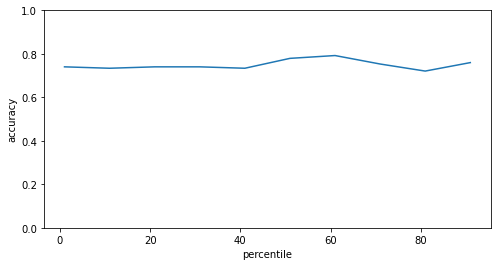

In [28]:
visualize_results_percentile(result_dict)